# Téléchargement et traitement d'une image optique Sentinel-2

## Importation des librairies Python
## Téléchargement d'images avec EODAG Python API

In [1]:
from eodag import EODataAccessGateway
from eodag import setup_logging
import glob
import rasterio as rio
import os
setup_logging(2)

C:\Users\Etudiant\miniconda3\envs\ProgPython\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
C:\Users\Etudiant\miniconda3\envs\ProgPython\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Configuration d'EODAG
#### Configuration manuelle

In [2]:
dag = EODataAccessGateway("C:/Users/Etudiant/Desktop/Radar_Python/eodag_config.yml")
dag.get_preferred_provider()

2026-01-14 19:28:49,140 eodag.config                     [INFO    ] Loading user configuration from: C:\Users\Etudiant\Desktop\Radar_Python\eodag_config.yml
2026-01-14 19:28:49,188 eodag.config                     [INFO    ] earth_search_cog: unknown provider found in user conf, trying to use provided configuration
2026-01-14 19:28:49,196 eodag.config                     [WARNING ] earth_search_cog skipped: could not be loaded from user configuration
2026-01-14 19:28:49,212 eodag.core                       [INFO    ] usgs: provider needing auth for search has been pruned because no credentials could be found
2026-01-14 19:28:49,219 eodag.core                       [INFO    ] aws_eos: provider needing auth for search has been pruned because no credentials could be found
2026-01-14 19:28:49,220 eodag.core                       [INFO    ] cop_ads: provider needing auth for search has been pruned because no credentials could be found
2026-01-14 19:28:49,221 eodag.core                      

('cop_dataspace', 1)

#### Définition de la recherche

In [3]:
zoi = "MULTIPOLYGON (((104.52883451087038225 12.06898919423234418, 104.52883451087038225 12.41506241553270584, 104.84303256705098306 12.41506241553270584, 104.84303256705098306 12.06898919423234418, 104.52883451087038225 12.06898919423234418)))"
search_criteria = {
    "productType": "S2_MSI_L2A",
    #"cloudCover" : 10,  # cloud cover Less than 10
    "start": "2025-06-17",
    "end": "2025-11-20",
    "geom": zoi,
    "count": True
}

## Téléchargement

In [4]:
all_products = dag.search_all(**search_criteria)
all_products

2026-01-14 19:29:12,717 eodag.core                       [INFO    ] Searching for all the products with provider cop_dataspace and a maximum of 1000 items per page.
2026-01-14 19:29:12,718 eodag.core                       [INFO    ] Iterate search over multiple pages: page #1
2026-01-14 19:29:12,723 eodag.core                       [INFO    ] Searching on provider cop_dataspace
2026-01-14 19:29:12,725 eodag.search.base                [INFO    ] cop_dataspace is configured with default sorting by 'startTimeFromAscendingNode' in ascending order
2026-01-14 19:29:12,790 eodag.search.qssearch            [INFO    ] Sending search request: https://catalogue.dataspace.copernicus.eu/odata/v1/Products?$filter=Collection/Name%20eq%20%27SENTINEL-2%27%20and%20OData.CSC.Intersects%28area=geography%27SRID=4326%3BMULTIPOLYGON%20%28%28%28104.5288%2012.0690%2C%20104.5288%2012.4151%2C%20104.8430%2012.4151%2C%20104.8430%2012.0690%2C%20104.5288%2012.0690%29%29%29%27%29%20and%20Attributes/OData.CSC.StringAt

SearchResult([EOProduct(id=S2C_MSIL2A_20250618T031541_N0511_R118_T48PVU_20250618T071616, provider=cop_dataspace),
              EOProduct(id=S2C_MSIL2A_20250621T032531_N0511_R018_T48PVU_20250621T083715, provider=cop_dataspace),
              EOProduct(id=S2B_MSIL2A_20250623T031519_N0511_R118_T48PVU_20250623T065717, provider=cop_dataspace),
              EOProduct(id=S2B_MSIL2A_20250626T032519_N0511_R018_T48PVU_20250626T070922, provider=cop_dataspace),
              EOProduct(id=S2C_MSIL2A_20250628T031601_N0511_R118_T48PVU_20250628T080919, provider=cop_dataspace),
              EOProduct(id=S2A_MSIL2A_20250630T032201_N0511_R118_T48PVU_20250630T072217, provider=cop_dataspace),
              EOProduct(id=S2C_MSIL2A_20250701T032601_N0511_R018_T48PVU_20250701T083220, provider=cop_dataspace),
              EOProduct(id=S2B_MSIL2A_20250703T031519_N0511_R118_T48PVU_20250703T065521, provider=cop_dataspace),
              EOProduct(id=S2A_MSIL2A_20250703T033201_N0511_R018_T48PVU_20250703T073617, provider=cop_dataspace),
              EOProduct(id=S2B_MSIL2A_20250706T032519_N0511_R018_T48PVU_20250706T071937, provider=cop_dataspace),
              EOProduct(id=S2C_MSIL2A_20250708T031601_N0511_R118_T48PVU_20250708T082223, provider=cop_dataspace),
              EOProduct(id=S2C_MSIL2A_20250711T032601_N0511_R018_T48PVU_20250711T082105, provider=cop_dataspace),
              EOProduct(id=S2B_MSIL2A_20250713T031519_N0511_R118_T48PVU_20250713T070504, provider=cop_dataspace),
              EOProduct(id=S2B_MSIL2A_20250716T032519_N0511_R018_T48PVU_20250716T071205, provider=cop_dataspace),
              EOProduct(id=S2C_MSIL2A_20250718T031601_N0511_R118_T48PVU_20250718T083115, provider=cop_dataspace),
              EOProduct(id=S2A_MSIL2A_20250720T032201_N0511_R118_T48PVU_20250720T075416, provider=cop_dataspace),
              EOProduct(id=S2C_MSIL2A_20250721T032601_N0511_R018_T48PVU_20250721T083815, provider=cop_dataspace),
              EOProduct(id=S2B_MSIL2A_20250723T031519_N0511_R118_T48PVU_20250723T070720, provider=cop_dataspace),
              EOProduct(id=S2A_MSIL2A_20250723T033201_N0511_R018_T48PVU_20250723T082115, provider=cop_dataspace),
              EOProduct(id=S2B_MSIL2A_20250726T032519_N0511_R018_T48PVU_20250726T070823, provider=cop_dataspace),
              EOProduct(id=S2C_MSIL2A_20250728T031601_N0511_R118_T48PVU_20250728T082013, provider=cop_dataspace),
              EOProduct(id=S2C_MSIL2A_20250731T032601_N0511_R018_T48PVU_20250731T082914, provider=cop_dataspace),
              EOProduct(id=S2B_MSIL2A_20250802T031519_N0511_R118_T48PVU_20250802T065803, provider=cop_dataspace),
              EOProduct(id=S2B_MSIL2A_20250805T032519_N0511_R018_T48PVU_20250805T071425, provider=cop_dataspace),
              EOProduct(id=S2C_MSIL2A_20250807T031541_N0511_R118_T48PVU_20250807T073117, provider=cop_dataspace),
              EOProduct(id=S2A_MSIL2A_20250809T032151_N0511_R118_T48PVU_20250809T071331, provider=cop_dataspace),
              EOProduct(id=S2B_MSIL2A_20250812T031519_N0511_R118_T48PVU_20250812T070532, provider=cop_dataspace),
              EOProduct(id=S2A_MSIL2A_20250812T033151_N0511_R018_T48PVU_20250812T074213, provider=cop_dataspace),
              EOProduct(id=S2B_MSIL2A_20250815T032519_N0511_R018_T48PVU_20250815T071234, provider=cop_dataspace),
              EOProduct(id=S2C_MSIL2A_20250817T031601_N0511_R118_T48PVU_20250817T085114, provider=cop_dataspace),
              EOProduct(id=S2C_MSIL2A_20250820T032601_N0511_R018_T48PVU_20250820T090713, provider=cop_dataspace),
              EOProduct(id=S2B_MSIL2A_20250822T031519_N0511_R118_T48PVU_20250822T065722, provider=cop_dataspace),
              EOProduct(id=S2B_MSIL2A_20250825T032519_N0511_R018_T48PVU_20250825T070656, provider=cop_dataspace),
              EOProduct(id=S2C_MSIL2A_20250827T031601_N0511_R118_T48PVU_20250827T081456, provider=cop_dataspace),
              EOProduct(id=S2A_MSIL2A_20250829T032151_N0511_R118_T48PVU_20250829T073414, provider=cop_dataspace),
          

In [ ]:
paths = dag.download(
    all_products[22],
    extract=False,
    outputs_prefix="C:/Users/Etudiant/Desktop/RADAR/Sentinel2/data"
)


0.00B [00:00, ?B/s]
S2B_MSIL2A_20250802T031519_N0511_R118_T48PVU_20250802T065803: 0.00B [00:00, ?B/s]2026-01-14 19:34:58,599 eodag.download.base              [INFO    ] Download url: https://catalogue.dataspace.copernicus.eu/odata/v1/Products(f8ec666d-d9fd-41ba-9667-ec538bc1c1fa)/$value

S2B_MSIL2A_20250802T031519_N0511_R118_T48PVU_20250802T065803:   0%|                         | 0.00/996M [00:00<?, ?B/s]
S2B_MSIL2A_20250802T031519_N0511_R118_T48PVU_20250802T065803:   0%|               | 65.5k/996M [00:00<2:24:38, 115kB/s]
S2B_MSIL2A_20250802T031519_N0511_R118_T48PVU_20250802T065803:   0%|                | 131k/996M [00:00<1:39:20, 167kB/s]
S2B_MSIL2A_20250802T031519_N0511_R118_T48PVU_20250802T065803:   0%|                | 197k/996M [00:01<1:14:50, 222kB/s]
S2B_MSIL2A_20250802T031519_N0511_R118_T48PVU_20250802T065803:   0%|                  | 328k/996M [00:01<50:35, 328kB/s]
S2B_MSIL2A_20250802T031519_N0511_R118_T48PVU_20250802T065803:   0%|                  | 459k/996M [00:01<41:51,

In [16]:
paths = dag.download(
    all_products[22],
    extract=False,
    outputs_prefix="C:/Users/Etudiant/Desktop/RADAR/Sentinel2/data"
)


0.00B [00:00, ?B/s]
S2B_MSIL2A_20250802T031519_N0511_R118_T48PVU_20250802T065803: 0.00B [00:00, ?B/s]2025-12-06 22:24:03,011 eodag.download.base              [INFO    ] Download url: https://catalogue.dataspace.copernicus.eu/odata/v1/Products(f8ec666d-d9fd-41ba-9667-ec538bc1c1fa)/$value

S2B_MSIL2A_20250802T031519_N0511_R118_T48PVU_20250802T065803:   0%|                         | 0.00/996M [00:00<?, ?B/s]
S2B_MSIL2A_20250802T031519_N0511_R118_T48PVU_20250802T065803:   0%|               | 65.5k/996M [00:00<2:08:27, 129kB/s]
S2B_MSIL2A_20250802T031519_N0511_R118_T48PVU_20250802T065803:   0%|                | 131k/996M [00:00<1:29:35, 185kB/s]
S2B_MSIL2A_20250802T031519_N0511_R118_T48PVU_20250802T065803:   0%|                | 197k/996M [00:00<1:04:03, 259kB/s]
S2B_MSIL2A_20250802T031519_N0511_R118_T48PVU_20250802T065803:   0%|                  | 262k/996M [00:01<50:42, 327kB/s]
S2B_MSIL2A_20250802T031519_N0511_R118_T48PVU_20250802T065803:   0%|                  | 328k/996M [00:01<44:26,

## Calcul NDWI
(Green - NIR) / (Green + NIR)

In [40]:
g = glob.glob("C:/Users/Etudiant/Desktop/RADAR/Sentinel2/data/*/*.SAFE/GRANULE/*/IMG_DATA/R10m/*B03*.jp2")
pir = glob.glob("C:/Users/Etudiant/Desktop/RADAR/Sentinel2/data/*/*.SAFE/GRANULE/*/IMG_DATA/R10m/*B08*.jp2")
outdir = 'C:/Users/Etudiant/Desktop/RADAR/Sentinel2/data/NDWI'
g

['C:/Users/Etudiant/Desktop/RADAR/Sentinel2/data\\S2B_MSIL2A_20250802T031519\\S2B_MSIL2A_20250802T031519_N0511_R118_T48PVU_20250802T065803.SAFE\\GRANULE\\L2A_T48PVU_A043902_20250802T033408\\IMG_DATA\\R10m\\T48PVU_20250802T031519_B03_10m.jp2',
 'C:/Users/Etudiant/Desktop/RADAR/Sentinel2/data\\S2C_MSIL2A_20251115T032501\\S2C_MSIL2A_20251115T032501_N0511_R118_T48PVU_20251115T061409.SAFE\\GRANULE\\L2A_T48PVU_A006237_20251115T033243\\IMG_DATA\\R10m\\T48PVU_20251115T032501_B03_10m.jp2']

In [41]:
for i, file in enumerate(g):
    meta = rio.open(file).meta
    meta.update({
        'dtype':'int16'
    })
    img_g = rio.open(file).read(1)
    img_pir = rio.open(pir[i]).read(1)
    outfile = os.path.basename(file).split("_")[1]
    with rio.open(os.path.join(outdir, f"{outfile}_ndwi.jp2"), 'w', **meta) as dst:
        ndwi = (img_g - img_pir) / (img_g + img_pir)
        dst.write(ndwi*1000, 1)


C:\Users\Etudiant\AppData\Local\Temp\ipykernel_17788\2850231251.py:10: RuntimeWarning: invalid value encountered in divide
  ndwi = (img_g - img_pir) / (img_g + img_pir)


In [42]:
meta

{'driver': 'JP2OpenJPEG',
 'dtype': 'int16',
 'nodata': None,
 'width': 10980,
 'height': 10980,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 48N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32648"]]'),
 'transform': Affine(10.0, 0.0, 399960.0,
        0.0, -10.0, 1400040.0)}

## Différence normalisée

In [60]:
indir = f'{outdir}'
files = glob.glob(f'{indir}/*ndwi.jp2')
files

['C:/Users/Etudiant/Desktop/RADAR/Sentinel2/data/NDWI\\20250802T031519_ndwi.jp2',
 'C:/Users/Etudiant/Desktop/RADAR/Sentinel2/data/NDWI\\20251115T032501_ndwi.jp2']

In [44]:
meta.update({
    'dtype':'int16'
})
with rio.open(os.path.join(outdir, "diffnorm.jp2"), 'w', **meta) as dst:
    av = rio.open(files[0]).read(1)
    ap = rio.open(files[1]).read(1)
    dn = (av - ap) /(av + ap)
    dst.write(dn*1000, 1)

C:\Users\Etudiant\AppData\Local\Temp\ipykernel_17788\16471169.py:7: RuntimeWarning: divide by zero encountered in divide
  dn = (av - ap) /(av + ap)
C:\Users\Etudiant\AppData\Local\Temp\ipykernel_17788\16471169.py:7: RuntimeWarning: invalid value encountered in divide
  dn = (av - ap) /(av + ap)


## Seuillagemask = image < -15000

In [47]:
outdir = 'C:/Users/Etudiant/Desktop/RADAR/Sentinel2/data/NDWI'

dn = rio.open(os.path.join(outdir, "diffnorm.jp2")).read(1)
meta = rio.open(os.path.join(outdir, "diffnorm.jp2")).meta

mask = dn > 900

meta.update({
    'dtype':'uint8'
})
with rio.open(os.path.join(outdir, "mask.jp2"), 'w', **meta) as dst:
    dst.write(mask, 1)

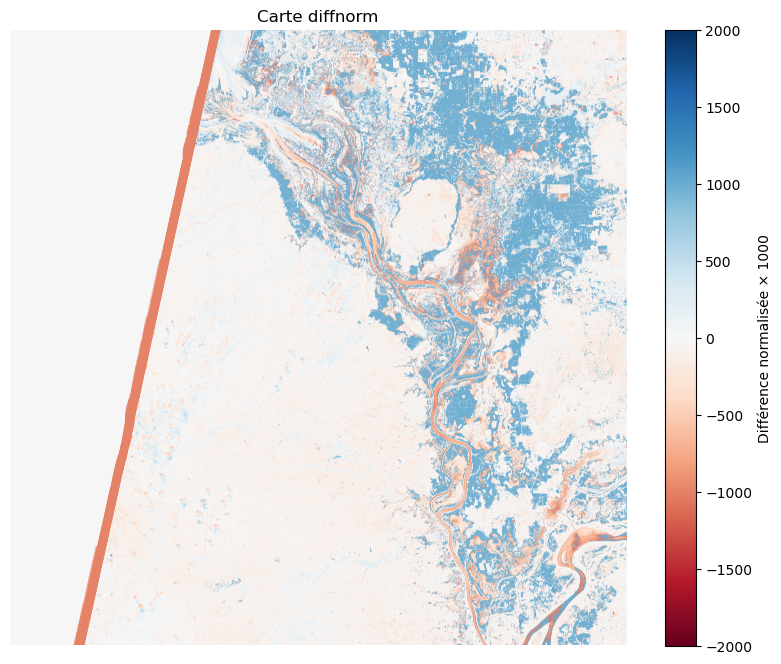

In [54]:
import matplotlib.pyplot as plt
import rasterio

# Ouvrir l'image JP2
with rasterio.open(os.path.join(outdir, "diffnorm.jp2")) as src:
    diffnorm = src.read(1)

# Affichage avec matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(diffnorm, cmap="RdBu", vmin=-2000, vmax=2000)  # ajuste vmin/vmax selon tes valeurs
plt.colorbar(label="Différence normalisée × 1000")
plt.title("Carte diffnorm")
plt.axis("off")
plt.show()

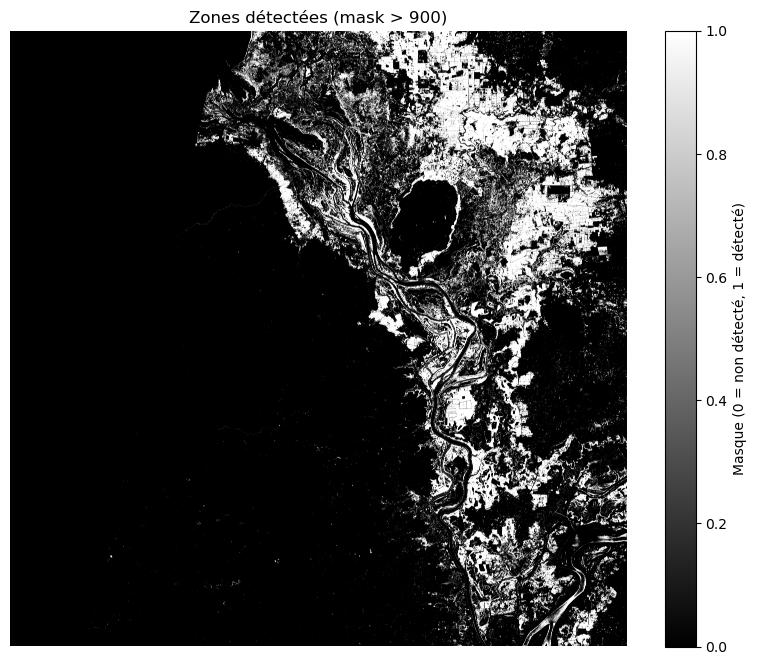

In [55]:
# Afficher le masque
plt.figure(figsize=(10, 8))
plt.imshow(mask, cmap="gray")
plt.colorbar(label="Masque (0 = non détecté, 1 = détecté)")
plt.title("Zones détectées (mask > 900)")
plt.axis("off")
plt.show()

In [58]:
import rasterio
import numpy as np
import pandas as pd
from rasterio.warp import reproject, Resampling
from sklearn.metrics import confusion_matrix, accuracy_score, cohen_kappa_score

# 🔹 Chemins vers tes fichiers
ndwi_path = "C:/Users/Etudiant/Desktop/RADAR/Sentinel2/data/NDWI/Change_Detection_NDWI.tif"
flood_path = "C:/Users/Etudiant/Desktop/RADAR/data/change_detectionQ.tif"

# 🔹 Lecture du NDWI
with rasterio.open(ndwi_path) as src_ndwi:
    y_true = src_ndwi.read(1).astype(int)

# 🔹 Lecture de la carte d'inondation
with rasterio.open(flood_path) as src_flood:
    y_pred_raw = src_flood.read(1).astype(int)
    aligned_pred = np.empty_like(y_true, dtype=np.int16)

    # Reprojection pour aligner les deux rasters
    reproject(
        source=y_pred_raw,
        destination=aligned_pred,
        src_transform=src_flood.transform,
        src_crs=src_flood.crs,
        dst_transform=src_ndwi.transform,
        dst_crs=src_ndwi.crs,
        resampling=Resampling.nearest
    )

# 🔹 Aplatir pour comparaison
y_true_flat = y_true.flatten()
y_pred_flat = aligned_pred.flatten()

# 🔹 Calcul des métriques
cm = confusion_matrix(y_true_flat, y_pred_flat, labels=[0,1])
acc = accuracy_score(y_true_flat, y_pred_flat)
kappa = cohen_kappa_score(y_true_flat, y_pred_flat)

# 🔹 Créer une DataFrame avec noms des classes
cm_df = pd.DataFrame(
    cm,
    index=["Référence: Non inondé", "Référence: Inondé"],
    columns=["Prédit: Non inondé", "Prédit: Inondé"]
)

# 🔹 Ajouter les métriques globales
metrics_df = pd.DataFrame({
    "Accuracy": [acc],
    "Kappa": [kappa]
})

# 🔹 Exporter vers Excel avec deux feuilles
out_excel = "C:/Users/Etudiant/Desktop/RADAR/validation_results.xlsx"
with pd.ExcelWriter(out_excel) as writer:
    cm_df.to_excel(writer, sheet_name="Matrice_confusion")
    metrics_df.to_excel(writer, sheet_name="Scores")

print(f"✅ Résultats exportés vers {out_excel}")

✅ Résultats exportés vers C:/Users/Etudiant/Desktop/RADAR/validation_results.xlsx
